In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
def read_background_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        event_tree = root_file["event_tree"]
        hit_tree = root_file["hit_tree"]
        photons_tree = root_file["arrival_photons_tree"]

        total_optical_photons = event_tree["total_optical_photons"].array()
        total_thermal_electrons = event_tree["total_thermal_electrons"].array()

        hit_times = hit_tree["hit_times"].array()
        hit_total_energy_deposits = hit_tree["hit_total_energy_deposit"].array()

        sensor_count = photons_tree["sensor_count"].array()

        return total_optical_photons, total_thermal_electrons, hit_times, hit_total_energy_deposits, sensor_count

In [3]:
bxdecay0_Ar39_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Ar39.root"
bxdecay0_Ar42_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Ar42.root"
bxdecay0_K42_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_K42.root"
bxdecay0_Bi214_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Bi214.root"
bxdecay0_Kr85_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Kr85.root"
bxdecay0_Pb214_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Pb214.root"
bxdecay0_Rn222_path = "/home/lane/Software/src/lumilar/system/data/bxdecay0_Rn222.root"
marley_B8_CC_path = "/home/lane/Software/src/lumilar/system/data/marley_B8_CC.root"
marley_B8_ES_path = "/home/lane/Software/src/lumilar/system/data/marley_B8_ES.root"
marley_HEP_CC_path = "/home/lane/Software/src/lumilar/system/data/marley_HEP_CC.root"
marley_HEP_ES_path = "/home/lane/Software/src/lumilar/system/data/marley_HEP_ES.root"

bxdecay0_Ar39_photons, bxdecay0_Ar39_electrons, bxdecay0_Ar39_times, bxdecay0_Ar39_energy, bxdecay0_Ar39_sensor_count = read_background_file(bxdecay0_Ar39_path)
bxdecay0_Ar42_photons, bxdecay0_Ar42_electrons, bxdecay0_Ar42_times, bxdecay0_Ar42_energy, bxdecay0_Ar42_sensor_count = read_background_file(bxdecay0_Ar42_path)
bxdecay0_K42_photons, bxdecay0_K42_electrons, bxdecay0_K42_times, bxdecay0_K42_energy, bxdecay0_K42_sensor_count = read_background_file(bxdecay0_K42_path)
bxdecay0_Bi214_photons, bxdecay0_Bi214_electrons, bxdecay0_Bi214_times, bxdecay0_Bi214_energy, bxdecay0_Bi214_sensor_count = read_background_file(bxdecay0_Bi214_path)
bxdecay0_Kr85_photons, bxdecay0_Kr85_electrons, bxdecay0_Kr85_times, bxdecay0_Kr85_energy, bxdecay0_Kr85_sensor_count = read_background_file(bxdecay0_Kr85_path)
bxdecay0_Pb214_photons, bxdecay0_Pb214_electrons, bxdecay0_Pb214_times, bxdecay0_Pb214_energy, bxdecay0_Pb214_sensor_count = read_background_file(bxdecay0_Pb214_path)
bxdecay0_Rn222_photons, bxdecay0_Rn222_electrons, bxdecay0_Rn222_times, bxdecay0_Rn222_energy, bxdecay0_Rn222_sensor_count = read_background_file(bxdecay0_Rn222_path)
marley_B8_CC_photons, marley_B8_CC_electrons, marley_B8_CC_times, marley_B8_CC_energy, marley_B8_CC_sensor_count = read_background_file(marley_B8_CC_path)
marley_B8_ES_photons, marley_B8_ES_electrons, marley_B8_ES_times, marley_B8_ES_energy, marley_B8_ES_sensor_count = read_background_file(marley_B8_ES_path)
marley_HEP_CC_photons, marley_HEP_CC_electrons, marley_HEP_CC_times, marley_HEP_CC_energy, marley_hep_CC_sensor_count = read_background_file(marley_HEP_CC_path)
marley_HEP_ES_photons, marley_HEP_ES_electrons, marley_HEP_ES_times, marley_HEP_ES_energy, marley_hep_ES_sensor_count = read_background_file(marley_HEP_ES_path)

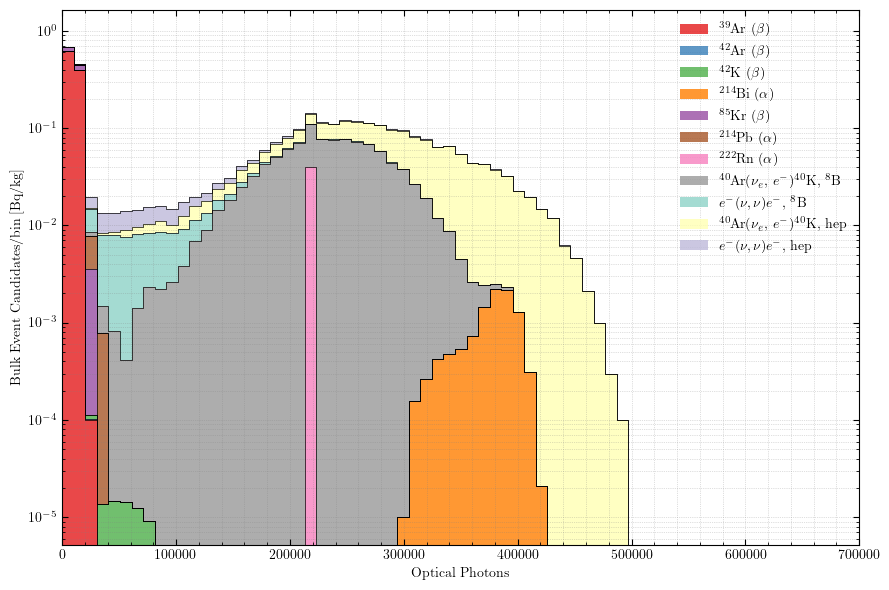

In [4]:
def histogram1D_optical_photons_stacked(photon_data_list, case_names, rates_list, plotname, title, xlabel, ylabel, bins, total_events=1.0, loc='../'):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    colors = [
    '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', 
    '#A65628', '#F781BF', '#999999', '#8DD3C7', '#FFFFB3', 
    '#BEBADA', '#FB8072', '#80B1D3', '#FDB462', '#B3DE69', 
    '#FCCDE5', '#D9D9D9', '#BC80BD', '#CCEBC5', '#FFED6F'
    ]

    fig, ax = plt.subplots(figsize=(9, 6))
    htotal = np.zeros(len(bins) - 1)
    
    for i, data in enumerate(photon_data_list):
        h, _ = np.histogram(data, bins=bins)
        h = np.array(h) * rates_list[i] / 10000
        ax.bar(bins[:-1], h, bottom=htotal, width=np.diff(bins), label=case_names[i],
               color=colors[i % len(colors)], alpha=0.8, align='edge')    
        htotal += h
        ax.step(bins, np.append(htotal, htotal[-1]), where='post', color='black', lw=0.5)

    ax.set_yscale('log')
    ax.legend(frameon=False, loc='best')
    ax.set_xlabel(xlabel)
    ax.set_xlim(bins[0], bins[-1])
    ax.set_ylabel(ylabel)

    ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
    ax.tick_params(which='minor', length=2)
    ax.minorticks_on()

    ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

    plt.tight_layout()
    plt.savefig(plotname, dpi=400)
    plt.show()

data_list = [bxdecay0_Ar39_photons, bxdecay0_Ar42_photons, bxdecay0_K42_photons, bxdecay0_Bi214_photons, bxdecay0_Kr85_photons, bxdecay0_Pb214_photons, bxdecay0_Rn222_photons, marley_B8_CC_photons, marley_B8_ES_photons, marley_HEP_CC_photons, marley_HEP_ES_photons]
rates_list = [1.010, 0.000092, 0.000092, 0.01, 0.115, 0.01, 0.04, 1, 0.1, 1, 0.1]


names_list = [
    r"$^{39}$Ar ($\beta$)", 
    r"$^{42}$Ar ($\beta$)", 
    r"$^{42}$K ($\beta$)", 
    r"$^{214}$Bi ($\alpha$)", 
    r"$^{85}$Kr ($\beta$)", 
    r"$^{214}$Pb ($\alpha$)", 
    r"$^{222}$Rn ($\alpha$)", 
    r"$^{40}$Ar($\nu_e$, $e^-$)$^{40}$K, $^{8}$B",
    r"$e^-(\nu, \nu)e^-$, $^{8}$B",
    r"$^{40}$Ar($\nu_e$, $e^-$)$^{40}$K, hep",        
    r"$e^-(\nu, \nu)e^-$, hep", 
]

bins = np.linspace(0, 700000, 70)
histogram1D_optical_photons_stacked(data_list, names_list, rates_list, 'optical_photons_histogram.png', 'Optical Photons', r'Optical Photons', 'Bulk Event Candidates/bin [Bq/kg]', bins)


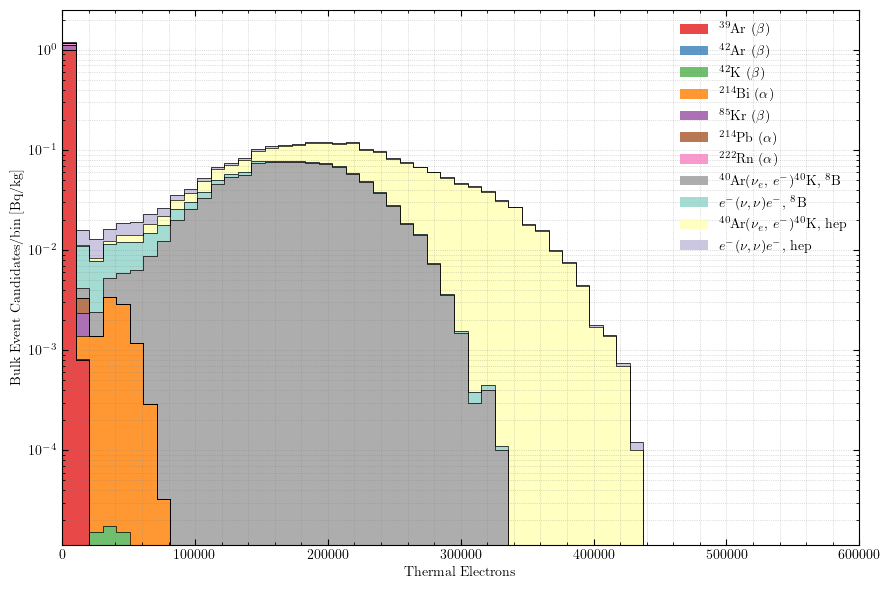

In [5]:
data_list_electrons = [bxdecay0_Ar39_electrons, bxdecay0_Ar42_electrons, bxdecay0_K42_electrons, bxdecay0_Bi214_electrons, bxdecay0_Kr85_electrons, bxdecay0_Pb214_electrons, bxdecay0_Rn222_electrons, marley_B8_CC_electrons, marley_B8_ES_electrons, marley_HEP_CC_electrons, marley_HEP_ES_electrons]
bins = np.linspace(0, 600000, 60)
histogram1D_optical_photons_stacked(data_list_electrons, names_list, rates_list, 'thermal_electrons_histogram.png', 'Thermal Electrons', r'Thermal Electrons', 'Bulk Event Candidates/bin [Bq/kg]', bins)


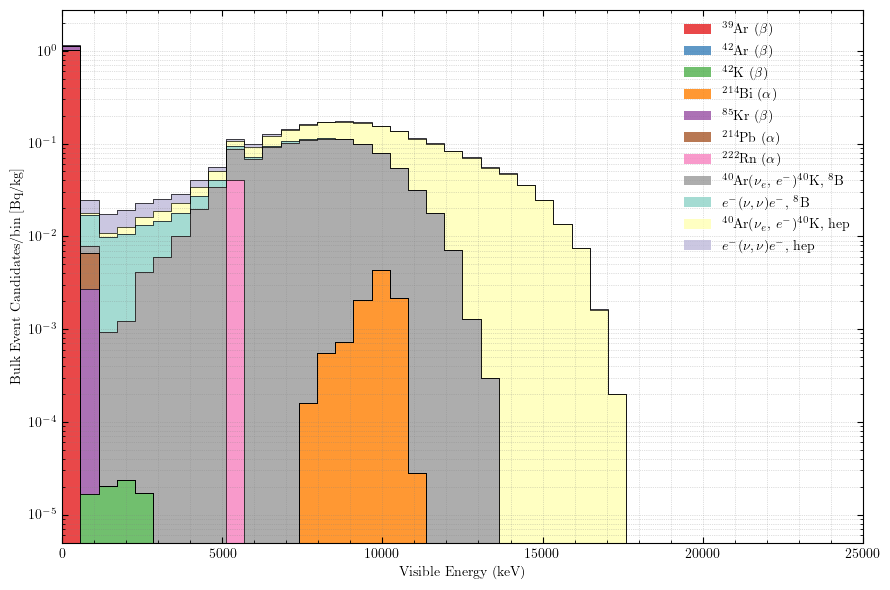

In [6]:
bins_energy = np.linspace(0, 25000, 45)
data_list_energy = [bxdecay0_Ar39_energy, bxdecay0_Ar42_energy, bxdecay0_K42_energy, bxdecay0_Bi214_energy, bxdecay0_Kr85_energy, bxdecay0_Pb214_energy, bxdecay0_Rn222_energy, marley_B8_CC_energy, marley_B8_ES_energy, marley_HEP_CC_energy, marley_HEP_ES_energy]
histogram1D_optical_photons_stacked(data_list_energy, names_list, rates_list, 'energy_histogram.png', 'Decay Energies', 'Visible Energy (keV)', 'Bulk Event Candidates/bin [Bq/kg]', bins_energy)


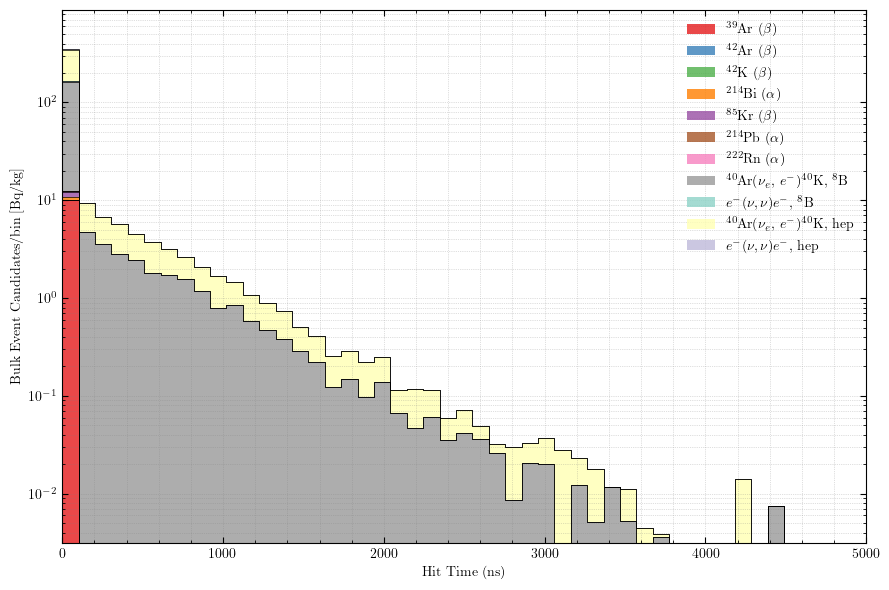

In [7]:
bins_times = np.linspace(0, 5000, 50)
data_list_times = [ak.flatten(bxdecay0_Ar39_times), ak.flatten(bxdecay0_Ar42_times), ak.flatten(bxdecay0_K42_times), ak.flatten(bxdecay0_Bi214_times), ak.flatten(bxdecay0_Kr85_times), ak.flatten(bxdecay0_Pb214_times), ak.flatten(bxdecay0_Rn222_times), ak.flatten(marley_B8_CC_times), ak.flatten(marley_B8_ES_times), ak.flatten(marley_HEP_CC_times), ak.flatten(marley_HEP_ES_times)]
histogram1D_optical_photons_stacked(data_list_times, names_list, rates_list, 'times_histogram.png', 'Decay Times', 'Hit Time (ns)', 'Bulk Event Candidates/bin [Bq/kg]', bins_times)


In [12]:
def scatter_plot(data_x_list, data_y_list, legend_labels, title, xlabel, ylabel, total_events=1.0, loc='../'):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    
    colors = [
        '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', 
        '#A65628', '#F781BF', '#999999', '#8DD3C7', '#FFFFB3', 
        '#BEBADA', '#FB8072', '#80B1D3', '#FDB462', '#B3DE69', 
        '#FCCDE5', '#D9D9D9', '#BC80BD', '#CCEBC5', '#FFED6F'
    ]

    fig, ax = plt.subplots(figsize=(9, 6))
    
    for i, (data_x, data_y) in enumerate(zip(data_x_list, data_y_list)):
        ax.scatter(data_x, data_y, color=colors[i % len(colors)], alpha=0.2, marker='x', label=legend_labels[i], s=20)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
    ax.tick_params(which='minor', length=2)
    ax.minorticks_on()

    leg = ax.legend(frameon=False, loc='best', handlelength=1, handleheight=1)
    for handle in leg.legendHandles:
        handle.set_alpha(1.0) 
        handle.set_sizes([30]) 
    
    ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

    plt.tight_layout()
    plt.show()


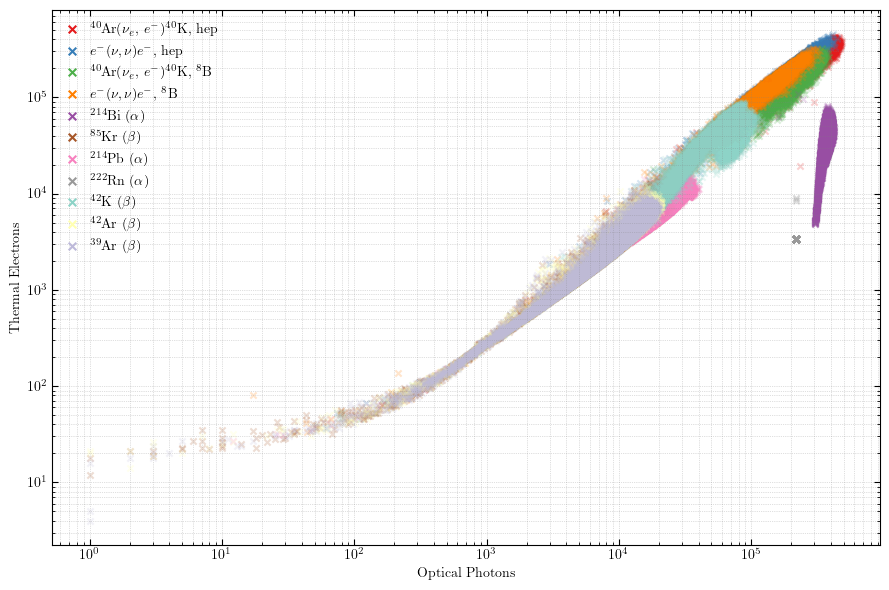

In [13]:
data_photons = [marley_HEP_CC_photons, marley_HEP_ES_photons, marley_B8_CC_photons, marley_B8_ES_photons, bxdecay0_Bi214_photons, bxdecay0_Kr85_photons, bxdecay0_Pb214_photons, bxdecay0_Rn222_photons, bxdecay0_K42_photons, bxdecay0_Ar42_photons, bxdecay0_Ar39_photons]
data_electrons = [marley_HEP_CC_electrons, marley_HEP_ES_electrons, marley_B8_CC_electrons, marley_B8_ES_electrons, bxdecay0_Bi214_electrons, bxdecay0_Kr85_electrons, bxdecay0_Pb214_electrons, bxdecay0_Rn222_electrons, bxdecay0_K42_electrons,  bxdecay0_Ar42_electrons, bxdecay0_Ar39_electrons]
names_list = [
    r"$^{40}$Ar($\nu_e$, $e^-$)$^{40}$K, hep",
    r"$e^-(\nu, \nu)e^-$, hep",
    r"$^{40}$Ar($\nu_e$, $e^-$)$^{40}$K, $^{8}$B",
    r"$e^-(\nu, \nu)e^-$, $^{8}$B",
    r"$^{214}$Bi ($\alpha$)",
    r"$^{85}$Kr ($\beta$)",
    r"$^{214}$Pb ($\alpha$)",
    r"$^{222}$Rn ($\alpha$)",
    r"$^{42}$K ($\beta$)",
    r"$^{42}$Ar ($\beta$)",
    r"$^{39}$Ar ($\beta$)"
]

scatter_plot(data_photons, data_electrons, names_list, "", r'Optical Photons', r'Thermal Electrons', "")

In [10]:
def add_poisson_fluctuation(number):
    """
    Add Poisson fluctuations to a given number.

    Args:
    - number (float): The input number.

    Returns:
    - int: A number with Poisson fluctuations.
    """
    return np.random.poisson(number)
    
bxdecay0_Ar39_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Ar39_sensor_count]
bxdecay0_Ar42_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Ar42_sensor_count]
bxdecay0_K42_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_K42_sensor_count]
bxdecay0_Bi214_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Bi214_sensor_count]
bxdecay0_Pb214_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Pb214_sensor_count]
bxdecay0_Rn222_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Rn222_sensor_count]
bxdecay0_Kr85_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in bxdecay0_Kr85_sensor_count]
marley_B8_ES_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in marley_B8_ES_sensor_count]
marley_B8_CC_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in marley_B8_CC_sensor_count]
marley_HEP_ES_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in marley_hep_ES_sensor_count]
marley_HEP_CC_total_count = [add_poisson_fluctuation(np.sum(event_count)) for event_count in marley_hep_CC_sensor_count]


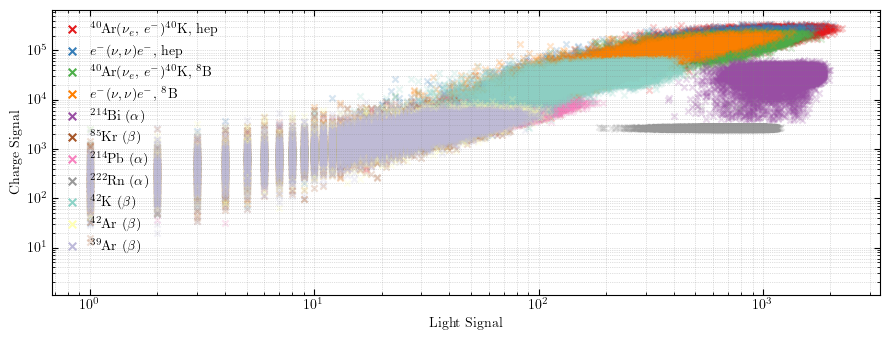

In [11]:
data_optical_counts = [marley_HEP_CC_total_count, marley_HEP_ES_total_count, marley_B8_CC_total_count, marley_B8_ES_total_count, bxdecay0_Bi214_total_count, bxdecay0_Kr85_total_count, bxdecay0_Pb214_total_count, bxdecay0_Rn222_total_count, bxdecay0_K42_total_count,  bxdecay0_Ar42_total_count, bxdecay0_Ar39_total_count]
data_electrons = [marley_HEP_CC_electrons, marley_HEP_ES_electrons, marley_B8_CC_electrons, marley_B8_ES_electrons, bxdecay0_Bi214_electrons, bxdecay0_Kr85_electrons, bxdecay0_Pb214_electrons, bxdecay0_Rn222_electrons, bxdecay0_K42_electrons,  bxdecay0_Ar42_electrons, bxdecay0_Ar39_electrons]

def add_fluctuations(value):
    binomial_val = np.random.binomial(value, 0.8)
    poisson_val = np.random.poisson(binomial_val)

    return poisson_val

fluctuated_data = [[add_fluctuations(val) for val in array] for array in data_electrons]
    
scatter_plot(data_optical_counts, fluctuated_data, names_list, "", r'Light Signal', r'Charge Signal', "")